In [2]:
%matplotlib inline


In [19]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [6]:
dbName = 'lsst-devl'
host = 'usdf-prompt-processing-dev.slac.stanford.edu'
schema = 'rubin' # will want to change this appropriately
user = 'rubin'
connection = psycopg2.connect(dbname=dbName, host=host, user=user, options=f'-c search_path={schema}')

In [11]:
df = pd.read_sql("""Select "trailLength" from "DiaSource";""",connection)

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
len(df)

1220566

In [45]:
ntrails = np.sum(~df['trailLength'].isna())
ntrails

530716

In [22]:
df['trailLength'].max()

3135.1433238487393

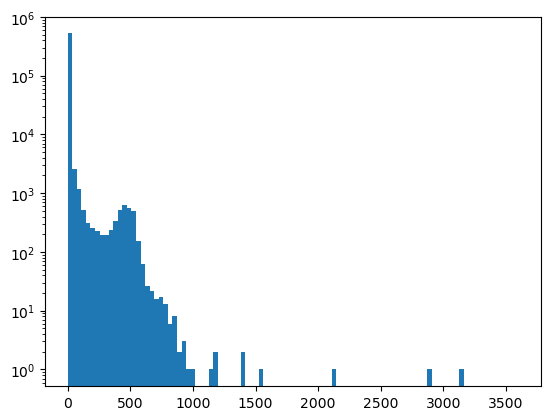

In [27]:
_=plt.hist(df['trailLength'],bins=np.linspace(0,3600,100))
plt.yscale('log')

In [38]:
# convert to degrees per day
# looking in the NOIRLab archive, HiTS uses a few different exposure times.  
# minimum common one is 86 seconds, so let's use that and be conservative
df['trailLength_deg_per_day'] = df['trailLength']/86/3600*24*3600

(0.0, 60.0)

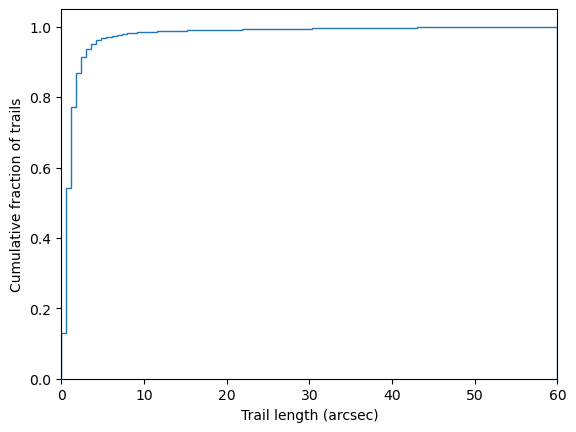

In [37]:

_=plt.hist(df['trailLength'],bins=np.linspace(0,60,100),
           histtype='step',cumulative=True,density=True)
#plt.yscale('log')
plt.xlabel('Trail length (arcsec)')
plt.ylabel('Cumulative fraction of trails')
plt.xlim(0,60)

(0.0, 40.0)

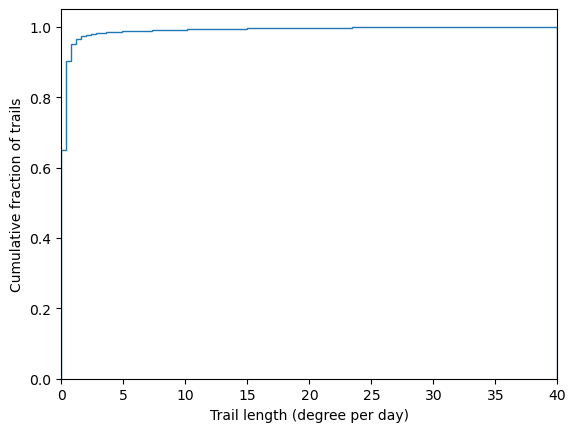

In [41]:

_=plt.hist(df['trailLength_deg_per_day'],bins=np.linspace(0,40,100),
           histtype='step',cumulative=True,density=True)
#plt.yscale('log')
plt.xlabel('Trail length (degree per day)')
plt.ylabel('Cumulative fraction of trails')
plt.xlim(0,40)

In [43]:
np.sum(df['trailLength_deg_per_day'] > 30)

4862

In [44]:
np.sum(df['trailLength_deg_per_day'] > 30)/len(df)

0.003983397866235828

In [46]:
np.sum(df['trailLength_deg_per_day'] > 30)/ntrails

0.009161208631358391

In [48]:
np.sum(df['trailLength'] <2)/ntrails

0.7986738670023139